In [16]:
import utils.training as train
import utils.constants as c
import pandas as pd
import utils.preprocessing as pp
import utils.evaluation as eval
import utils.visualization as vis


In [17]:
import importlib

importlib.reload(train)
importlib.reload(c)
importlib.reload(pp)
importlib.reload(eval)
importlib.reload(vis)

<module 'utils.visualization' from 'd:\\FERI\\transfer-learning\\src\\utils\\visualization.py'>

In [20]:
commodity = 'Rice'

param_grid = {
    'network_type': ['RNN', 'LSTM', 'GRU'],
    'window_size': [2, 4, 6],
    'learning_rate': [1e-4, 1e-2],
    'num_layers': [1, 2, 3],
    'neurons_per_layer': [32, 64, 128],
    'batch_size': [16, 32, 64]
}

{'network_type': 'RNN', 'window_size': 2, 'learning_rate': 0.007692806971300688, 'num_layers': 2, 'neurons_per_layer': 32, 'batch_size': 64} {'val_loss': 0.0878840908408165, 'val_mae': 0.2628827393054962, 'test_mse': 0.014810619202861811, 'test_mae': 0.08666461588207043}
1/1 [==============================] - 0s 29ms/step


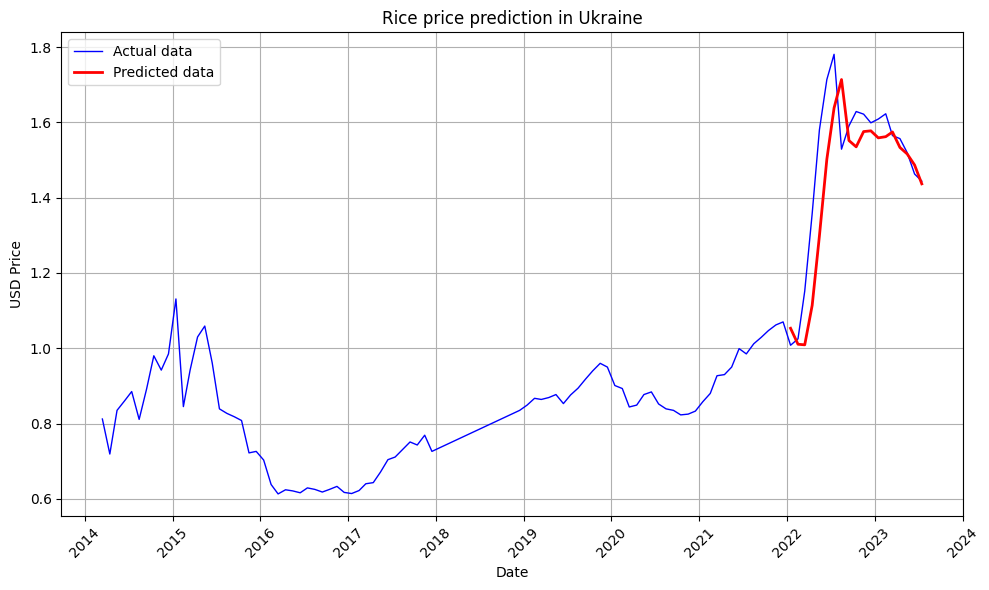

c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\transfer-learning-c0qmjA8b-py3.9\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'network_type': 'LSTM', 'window_size': 2, 'learning_rate': 0.0026591321963690294, 'num_layers': 2, 'neurons_per_layer': 128, 'batch_size': 32} {'val_loss': 0.010280425660312176, 'val_mae': 0.08195263892412186, 'test_mse': 0.00019783569402084632, 'test_mae': 0.00944047591384028}
3/3 [==============================] - 0s 4ms/step


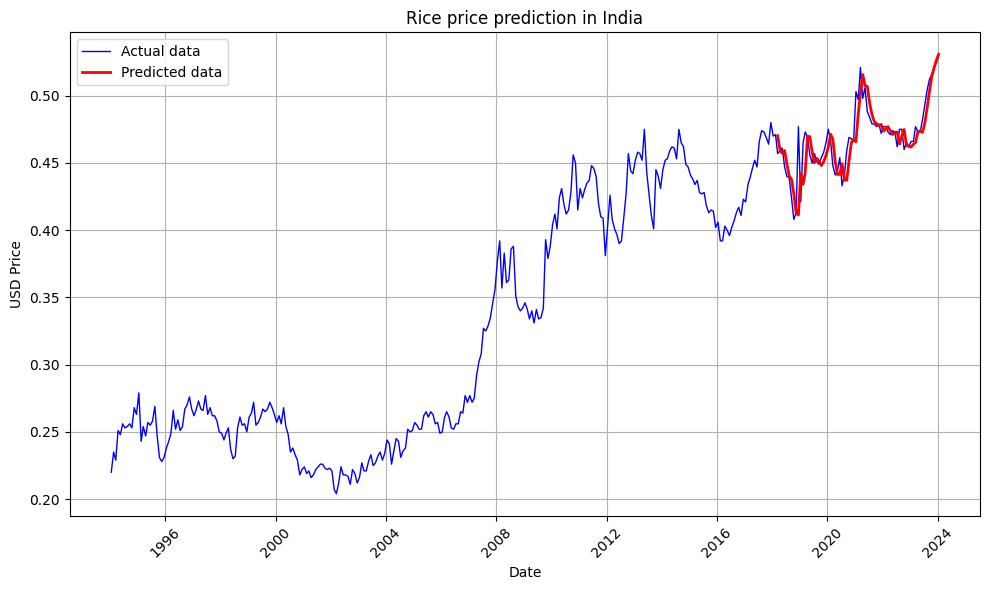

c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\transfer-learning-c0qmjA8b-py3.9\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'network_type': 'LSTM', 'window_size': 4, 'learning_rate': 0.0016146761775819773, 'num_layers': 1, 'neurons_per_layer': 128, 'batch_size': 16} {'val_loss': 0.00934877060353756, 'val_mae': 0.07765839993953705, 'test_mse': 0.0005662712275938747, 'test_mae': 0.015608172824166041}
2/2 [==============================] - 0s 18ms/step


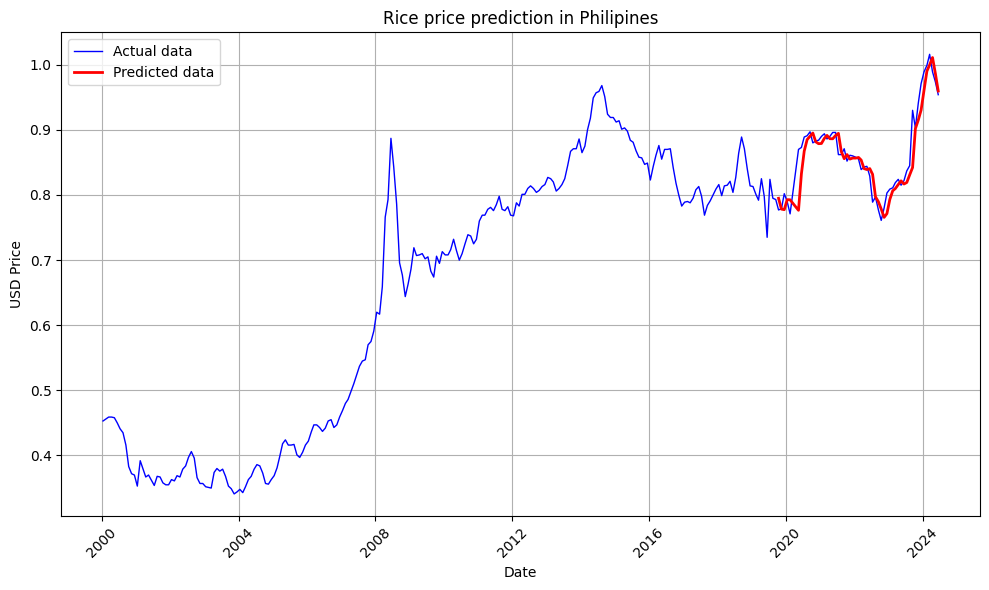

c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\transfer-learning-c0qmjA8b-py3.9\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'network_type': 'RNN', 'window_size': 2, 'learning_rate': 0.0038997276738935664, 'num_layers': 1, 'neurons_per_layer': 128, 'batch_size': 32} {'val_loss': 0.006452597212046385, 'val_mae': 0.06358929723501205, 'test_mse': 0.0006583449591776759, 'test_mae': 0.017886030495166787}
2/2 [==============================] - 0s 9ms/step


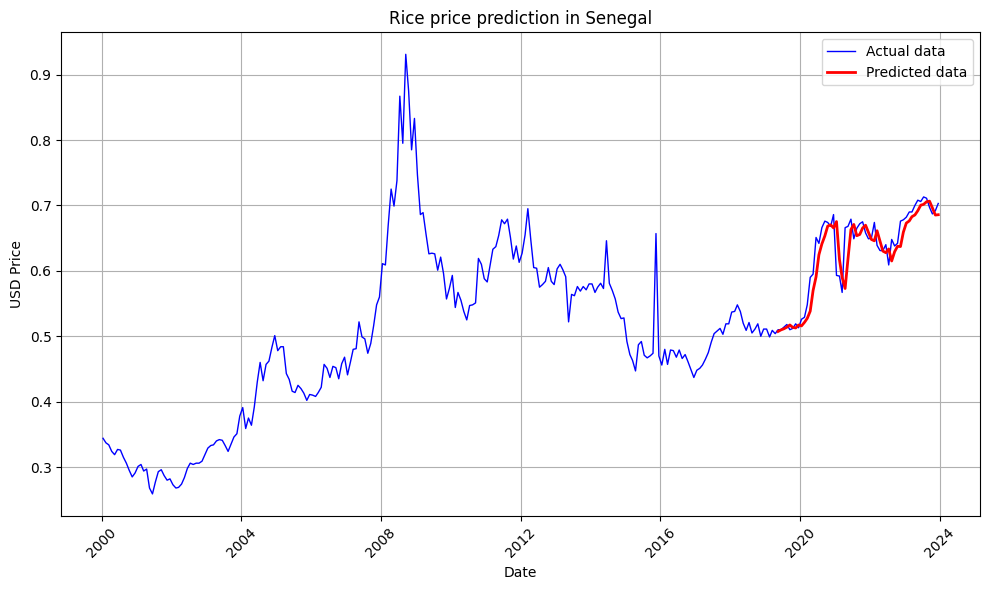

c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\transfer-learning-c0qmjA8b-py3.9\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'network_type': 'RNN', 'window_size': 2, 'learning_rate': 0.007745615878257481, 'num_layers': 3, 'neurons_per_layer': 32, 'batch_size': 32} {'val_loss': 0.07488633692264557, 'val_mae': 0.18211042881011963, 'test_mse': 0.00023245300103298485, 'test_mae': 0.012376145815237969}
2/2 [==============================] - 0s 14ms/step


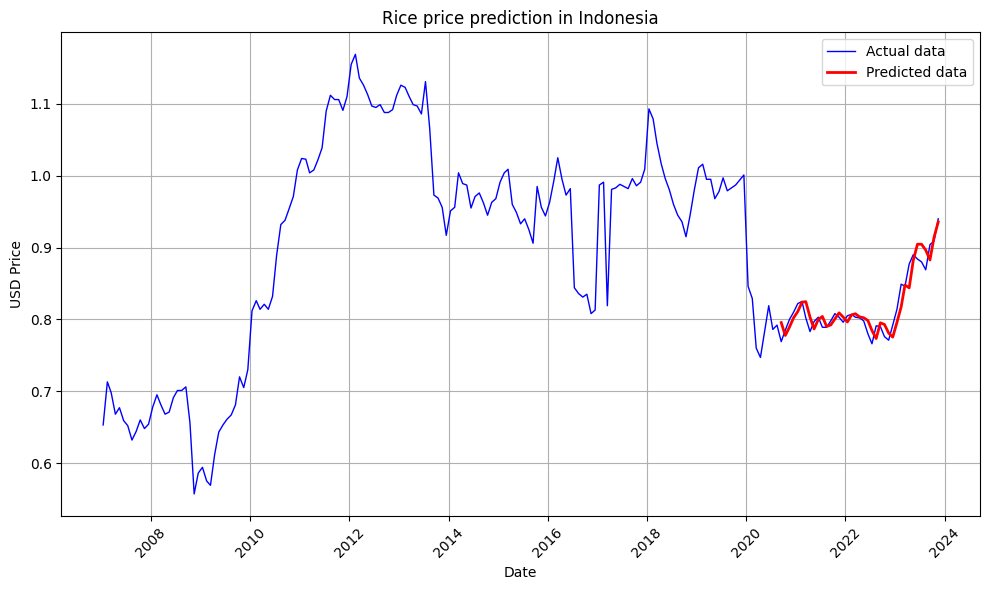

c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\transfer-learning-c0qmjA8b-py3.9\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
for country in ['Ukraine', 'India', 'Philipines', 'Senegal', 'Indonesia']:
    dataset_info = {
    'country': country,
    'commodity': commodity
    }
    
    df = pd.read_csv(c.get_countries(commodity, country)['processed'])
    
    best_model, best_params, metrics = train.random_search_rnn(df[['usdprice']], param_grid, dataset_info , num_iterations=50)
    
    print(best_params, metrics)
    
    vis.plot_best_model(df, best_model, best_params, c.get_scaler_filename(country, commodity), f'{commodity} price prediction in {country}')
    
    best_model.save(c.get_model_filename(country, commodity))
    